<a href="https://colab.research.google.com/github/LRLeite/Data-Analytics/blob/main/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Análise dos dados da COVID-19**

# **Importar dataset diretamente do Github, selecionar colunas de interesse e tratar os dados**
Informações sobre o dataset: https://github.com/owid/covid-19-data/tree/master/public/data

Obs: sistema de separação de milhar e decimal em inglês

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker

In [2]:
#Base de dados
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
#Data do primeiro e último registro
print(f'Primeiro registro: {df.date.min()}')
print(f'Última atualização: {df.date.max()}')


Primeiro registro: 2020-01-01
Última atualização: 2022-11-25


<h2>Selecionar colunas de interesse</h2>

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
columns_final = ['continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'total_deaths_per_million', 
                 'total_tests', 'total_tests_per_thousand', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','total_vaccinations_per_hundred', 
                 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations', 'population']

df.drop(columns=df.columns.difference(columns_final), inplace = True)

df.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
1,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
2,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
3,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
4,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0


<h2>Tratar dados</h2>

In [6]:
#Substituir valores NaN por zero
df.fillna(df[['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'total_deaths_per_million', 'total_tests', 'total_tests_per_thousand', 'total_vaccinations', 'people_vaccinated', 
              'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations', 'population']].fillna(0), inplace = True)

df.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
1,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
2,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
3,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
4,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0


In [7]:
#Converter float para int
df[['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_tests', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'population']] = df[['total_cases', 'new_cases', 'total_deaths', 
                                                                                                                                                                                            'new_deaths', 'total_tests', 'total_vaccinations', 
                                                                                                                                                                                            'people_vaccinated', 'people_fully_vaccinated', 
                                                                                                                                                                                            'new_vaccinations', 'population']].astype(int)

In [8]:
df.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,Asia,Afghanistan,2020-02-24,5,5,0,0,0.122,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,41128772
1,Asia,Afghanistan,2020-02-25,5,0,0,0,0.122,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,41128772
2,Asia,Afghanistan,2020-02-26,5,0,0,0,0.122,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,41128772
3,Asia,Afghanistan,2020-02-27,5,0,0,0,0.122,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,41128772
4,Asia,Afghanistan,2020-02-28,5,0,0,0,0.122,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,41128772


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237708 entries, 0 to 237707
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   continent                            224307 non-null  object 
 1   location                             237708 non-null  object 
 2   date                                 237708 non-null  object 
 3   total_cases                          237708 non-null  int64  
 4   new_cases                            237708 non-null  int64  
 5   total_deaths                         237708 non-null  int64  
 6   new_deaths                           237708 non-null  int64  
 7   total_cases_per_million              237708 non-null  float64
 8   total_deaths_per_million             237708 non-null  float64
 9   total_tests                          237708 non-null  int64  
 10  total_tests_per_thousand             237708 non-null  float64
 11  total_vaccina

Serão excluídos das análises os países que não reportaram os números de casos e de vacinação

In [10]:
#Localizar países que não reportaram o número de casos de covid-19
df[['location', 'total_cases']].groupby('location').max().sort_values(by = 'total_cases').head(30)

,total_cases
location,
Northern Ireland,0
Pitcairn,0
Tokelau,0
Niue,0
Jersey,0
United States Virgin Islands,0
Northern Cyprus,0
Turkmenistan,0
Scotland,0


In [11]:
#Verificar os dados dos países que apresentam baixos números de casos ou nenhum
df[['location', 'total_cases']].loc[df.location.isin(['England', 'Puerto Rico', 'Turkmenistan', 'Niue', 'Jersey', 'United States Virgin Islands', 'Scotland', 'Northern Cyprus',
                                         'Sint Maarten (Dutch part)', 'Tokelau', 'Northern Ireland', 'Puerto Rico', 'Northern Mariana Islands', 'Guernsey', 'Guam', 
                                         'Western Sahara', 'Pitcairn', 'Wales', 'North Korea', 'Vatican', 'Tuvalu', 'Macao', 'Montserrat'])].groupby('location').describe()

total_cases                                     \
                                   count        mean         std  min   25%   
location                                                                      
England                            979.0    0.000000    0.000000  0.0   0.0   
Guam                               829.0    0.000000    0.000000  0.0   0.0   
Guernsey                           667.0    0.000000    0.000000  0.0   0.0   
Jersey                             617.0    0.000000    0.000000  0.0   0.0   
Macao                             1039.0  157.539942  250.943196  1.0  46.0   
Montserrat                         983.0  273.194303  462.768739  1.0  13.0   
Niue                               408.0    0.000000    0.000000  0.0   0.0   
North Korea                        925.0    0.211892    0.408870  0.0   0.0   
Northern Cyprus                    317.0    0.000000    0.000000  0.0   0.0   
Northern Ireland                   998.0    0.000000    0.000000  0.0   0.0   
Northern Mariana Islands           610.0    0.000000    0.000000  0.0   0.0   
Pitcairn                           441.0    0.000000    0.000000  0.0   0.0   
Puerto Rico                        840.0    0.000000    0.000000  0.0   0.0   
Scotland                           990.0    0.000000    0.000000  0.0   0.0   
Sint Maarten (Dutch part)          547.0    0.000000    0.000000  0.0   0.0   
Tokelau                            491.0    0.000000    0.000000  0.0   0.0   
Turkmenistan                       554.0    0.000000    0.000000  0.0   0.0   
Tuvalu                             578.0   53.866782  318.793721  0.0   0.0   
United States Virgin Islands       818.0    0.000000    0.000000  0.0   0.0   
Vatican                            995.0   23.910553    7.482175  1.0  27.0   
Wales                              975.0    0.000000    0.000000  0.0   0.0   
Western Sahara                       1.0    0.000000         NaN  0.0   0.0   

                                                   
                               50%    75%     max  
location                                           
England                        0.0    0.0     0.0  
Guam                           0.0    0.0     0.0  
Guernsey                       0.0    0.0     0.0  
Jersey                         0.0    0.0     0.0  
Macao                         53.0   82.0   796.0  
Montserrat                    21.0  174.0  1403.0  
Niue                           0.0    0.0     0.0  
North Korea                    0.0    0.0     1.0  
Northern Cyprus                0.0    0.0     0.0  
Northern Ireland               0.0    0.0     0.0  
Northern Mariana Islands       0.0    0.0     0.0  
Pitcairn                       0.0    0.0     0.0  
Puerto Rico                    0.0    0.0     0.0  
Scotland                       0.0    0.0     0.0  
Sint Maarten (Dutch part)      0.0    0.0     0.0  
Tokelau                        0.0    0.0     0.0  
Turkmenistan                   0.0    0.0     0.0  
Tuvalu                         0.0    3.0  2828.0  
United States Virgin Islands   0.0    0.0     0.0  
Vatican                       27.0   29.0    29.0  
Wales                          0.0    0.0     0.0  
Western Sahara                 0.0    0.0     0.0

In [12]:
#Remover os registros dos países que apresentam poucos ou nenhum caso até o 3° quartil (75% dos dias)
df = df[df.location.isin(['England', 'Puerto Rico', 'Turkmenistan', 'Niue', 'Jersey', 'United States Virgin Islands', 'Scotland', 'Northern Cyprus',
                                         'Sint Maarten (Dutch part)', 'Tokelau', 'Northern Ireland', 'Puerto Rico', 'Northern Mariana Islands', 'Guernsey', 'Guam', 
                                         'Western Sahara', 'Pitcairn', 'Wales', 'North Korea', 'Tuvalu', 'Vatican']) == False]

In [13]:
#Verificar os países que não reportaram os dados da vacinação
df[['location', 'total_vaccinations']].groupby('location').max().sort_values(by = 'total_vaccinations').head(30)

,total_vaccinations
location,
Saint Pierre and Miquelon,0
Micronesia (country),0
Marshall Islands,0
International,0
Eritrea,0
Palau,0
Falkland Islands,4407
Montserrat,4564
Saint Helena,7892


In [14]:
#Remover os registros dos países que não apresentaram dados da vacinação
df = df[df.location.isin(['Eritrea', 'Marshall Islands', 'Saint Pierre and Miquelon', 'Palau']) == False]



---


# **Análises**


---



# **Número de casos, mortes e vacinas no mundo ao longo do tempo**

In [15]:
#Dados do número de casos, mortes e vacinas diários no mundo
world_plot = df[['date', 'location', 'new_cases', 'new_deaths', 'new_vaccinations']].loc[df.location == 'World'].set_index('date')
world_plot.head()

,location,new_cases,new_deaths,new_vaccinations
date,,,,
2020-01-22,World,0,0,0
2020-01-23,World,100,1,0
2020-01-24,World,287,8,0
2020-01-25,World,493,16,0
2020-01-26,World,683,14,0


In [16]:
#Dados médias móveis de 14 dias
world_plot_MM = world_plot[['new_cases', 'new_deaths', 'new_vaccinations']].rolling(14).mean().round(2).fillna(0)
world_plot_MM.rename(columns = {'new_cases': 'new_cases_MM14', 'new_deaths': 'new_deaths_MM14', 'new_vaccinations': 'new_vaccinations_MM14'}, inplace = True)
world_plot_MM.tail()

,new_cases_MM14,new_deaths_MM14,new_vaccinations_MM14
date,,,
2022-11-21,392091.21,1352.00,2525046.79
2022-11-22,402126.07,1397.57,2320491.50
2022-11-23,414220.43,1415.93,2031148.14
2022-11-24,437254.79,1407.86,1778537.07
2022-11-25,451852.71,1434.00,1522034.50


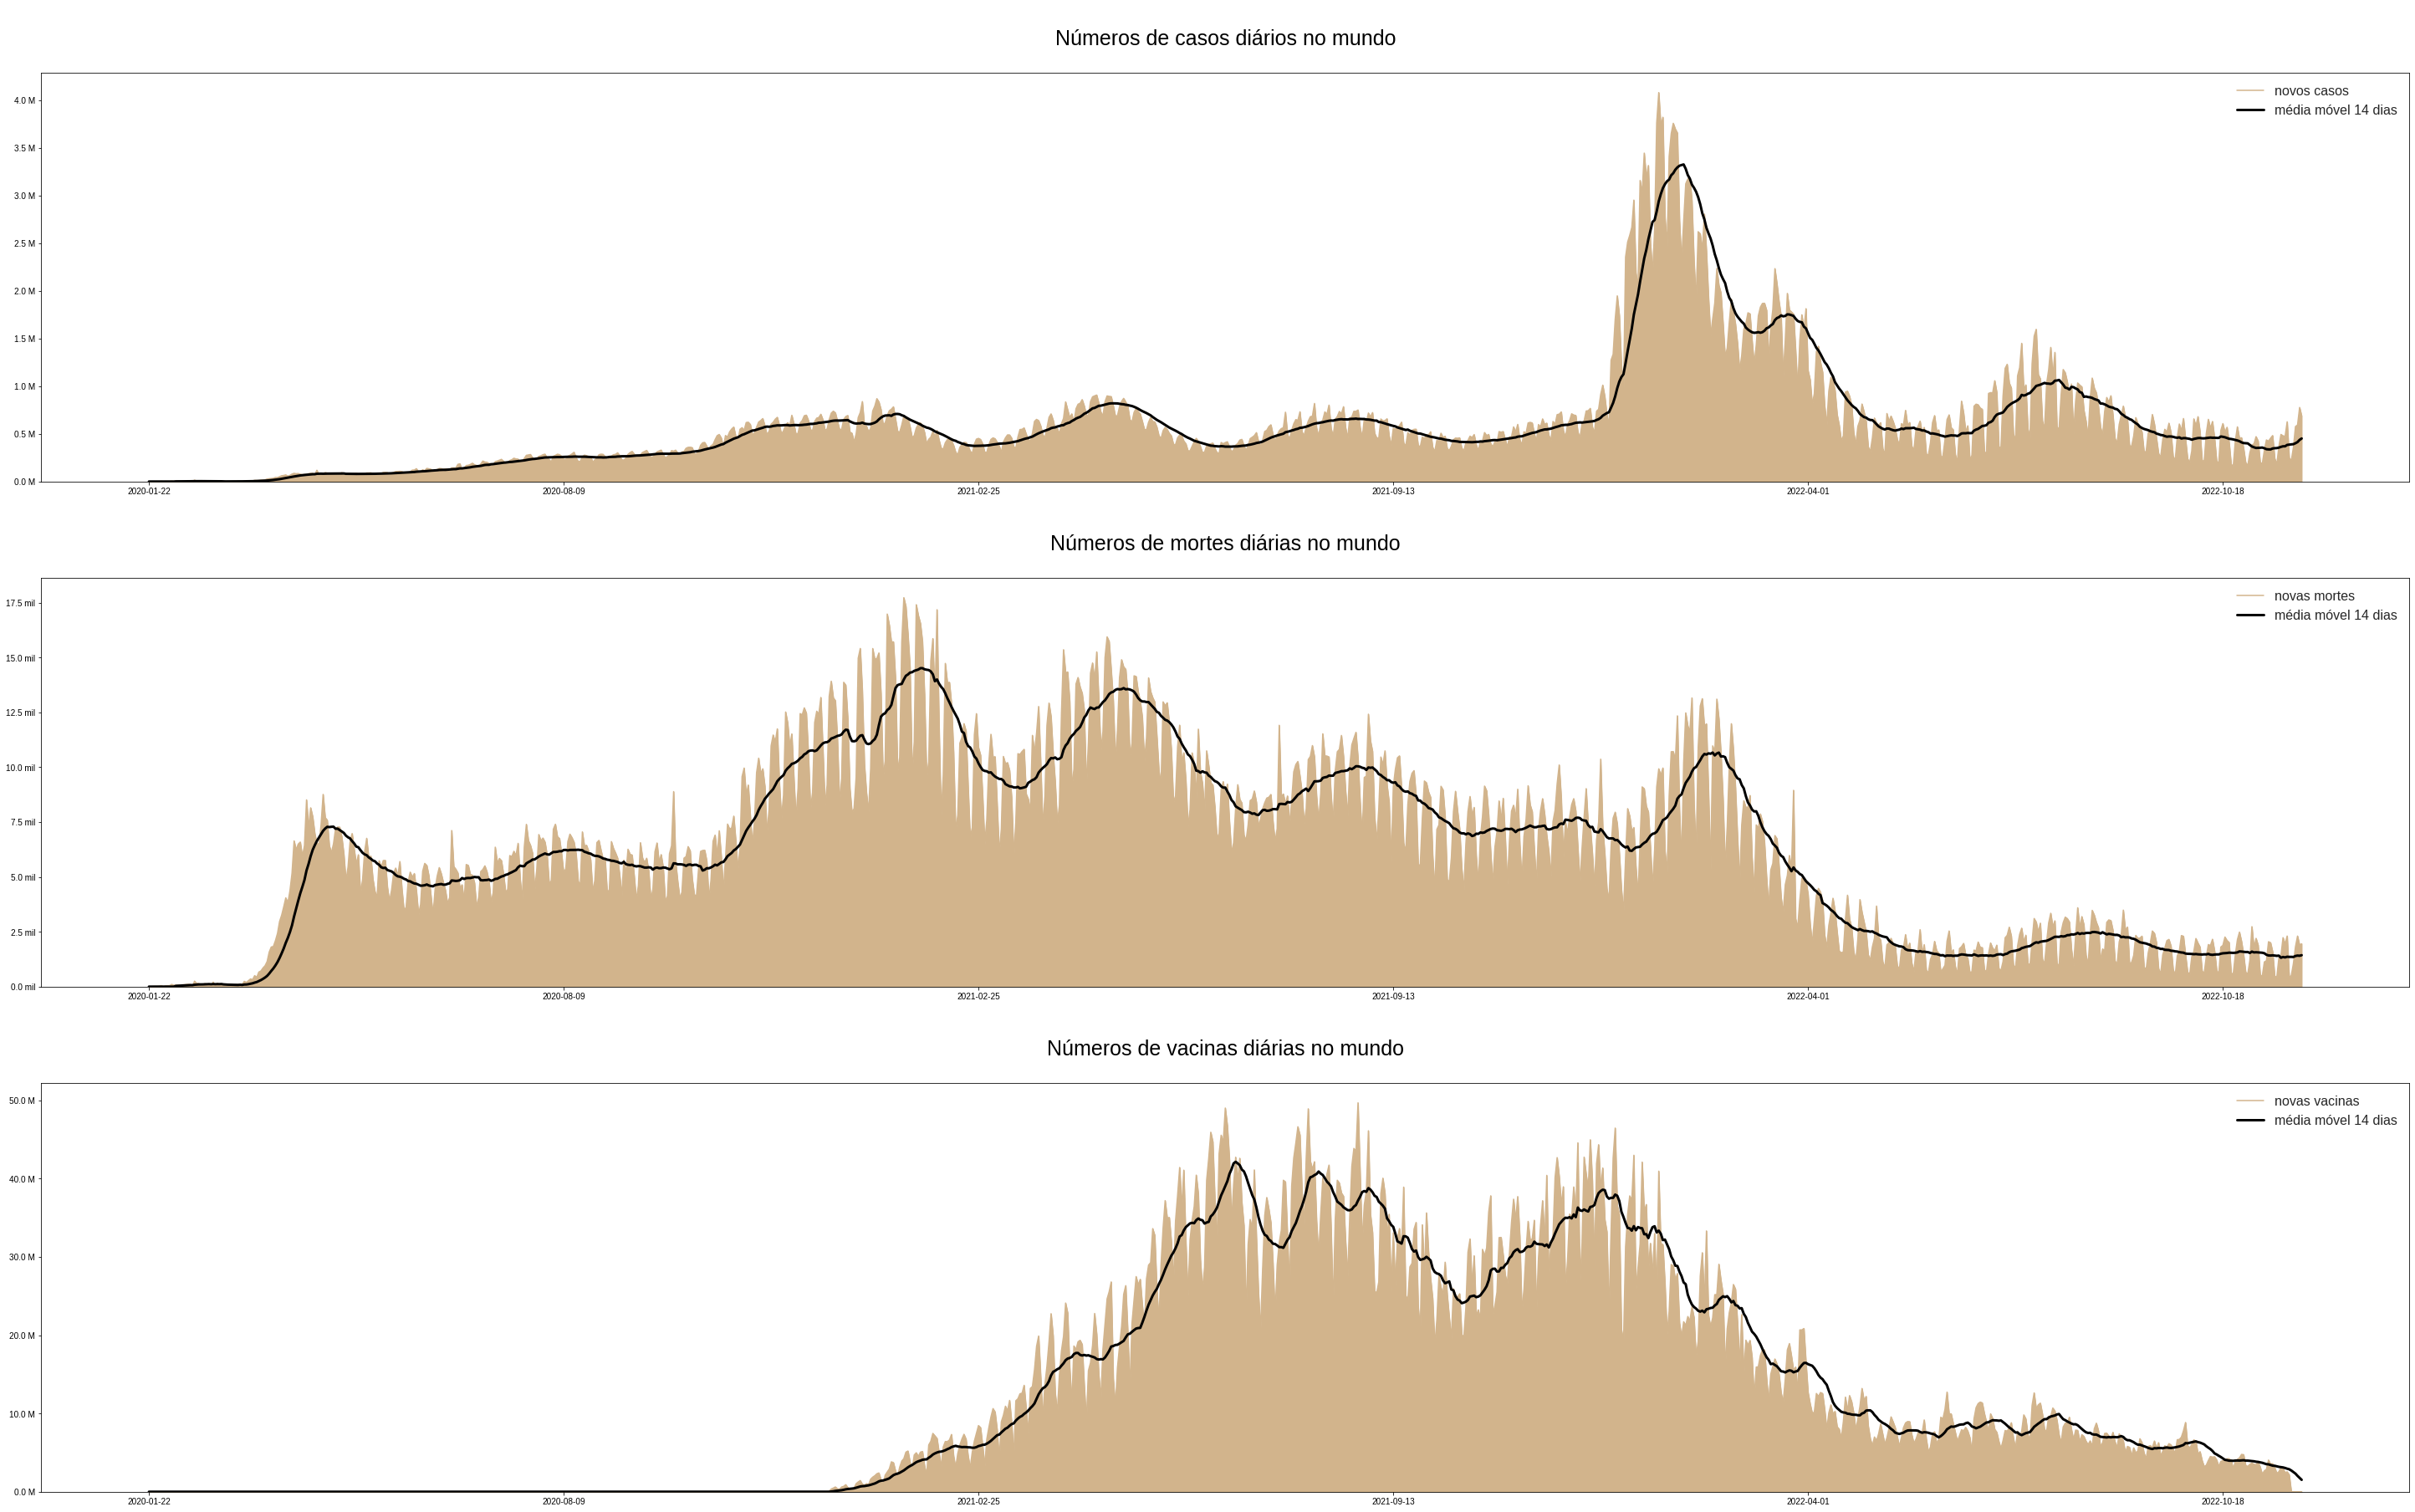

In [17]:
#Gráfico do número de casos, mortes e vacinas diários no mundo
fig, ax = plt.subplots(3, 1, figsize = (40, 25), constrained_layout=True)
plt.style.use(['seaborn-dark'])

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

world_plot.plot(kind = 'area', subplots = True, ax = [ax[0], ax[1], ax[2]], color = 'tan', legend = None)
world_plot_MM.plot(kind = 'line', subplots = True, ax = [ax[0], ax[1], ax[2]], linestyle = 'solid',  color = 'black', linewidth = 3)

ax[0].set_title('\n Números de casos diários no mundo \n', fontsize = 25)
ax[0].ticklabel_format(style = 'plain', axis = 'y')
ax[0].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '%1.1f' % (x*1e-6) + ' M'))
ax[0].set_xlabel(None)
ax[0].legend(('novos casos','média móvel 14 dias'), fontsize = 16)

ax[1].set_title('\n Números de mortes diárias no mundo \n', fontsize = 25)
ax[1].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '%1.1f' % (x / 1000) + ' mil'))
ax[1].set_xlabel(None)
ax[1].legend(('novas mortes','média móvel 14 dias'), fontsize = 16)

ax[2].set_title('\n Números de vacinas diárias no mundo \n', fontsize = 25)
ax[2].ticklabel_format(style = 'plain', axis = 'y')
ax[2].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: '%1.1f' % (x*1e-6) + ' M'))
ax[2].set_xlabel(None)
ax[2].legend(('novas vacinas','média móvel 14 dias'), fontsize = 16)

fig.show()

# **Número de casos, mortes, vacinas e relação caso-fatalidade por continente**


In [18]:
#Selecionar os dados de interesse para analisar os números por continente
df_continents = df[['location','total_cases', 'total_deaths', 'total_vaccinations']].loc[df.location.isin(['Asia', 'Europe', 'Africa', 'North America', 'South America','Oceania'])]
df_continents = df_continents.groupby('location')[['total_cases', 'total_deaths', 'total_vaccinations']].max().sort_values(by = 'location')

In [19]:
#Calcular a relação caso-fatalidade
df_continents['case_fatality_ratio'] = ((df_continents['total_deaths']/df_continents['total_cases']) * 100).round(2)

In [20]:
#Converter o índice 'location' em coluna, resetar e dropar o índice anterior e depois reordenar as colunas
df_continents['continent'] = df_continents.index
df_continents.reset_index(drop = True, inplace = True)
df_continents = df_continents[['continent', 'total_cases', 'total_deaths', 'total_vaccinations', 'case_fatality_ratio']] 

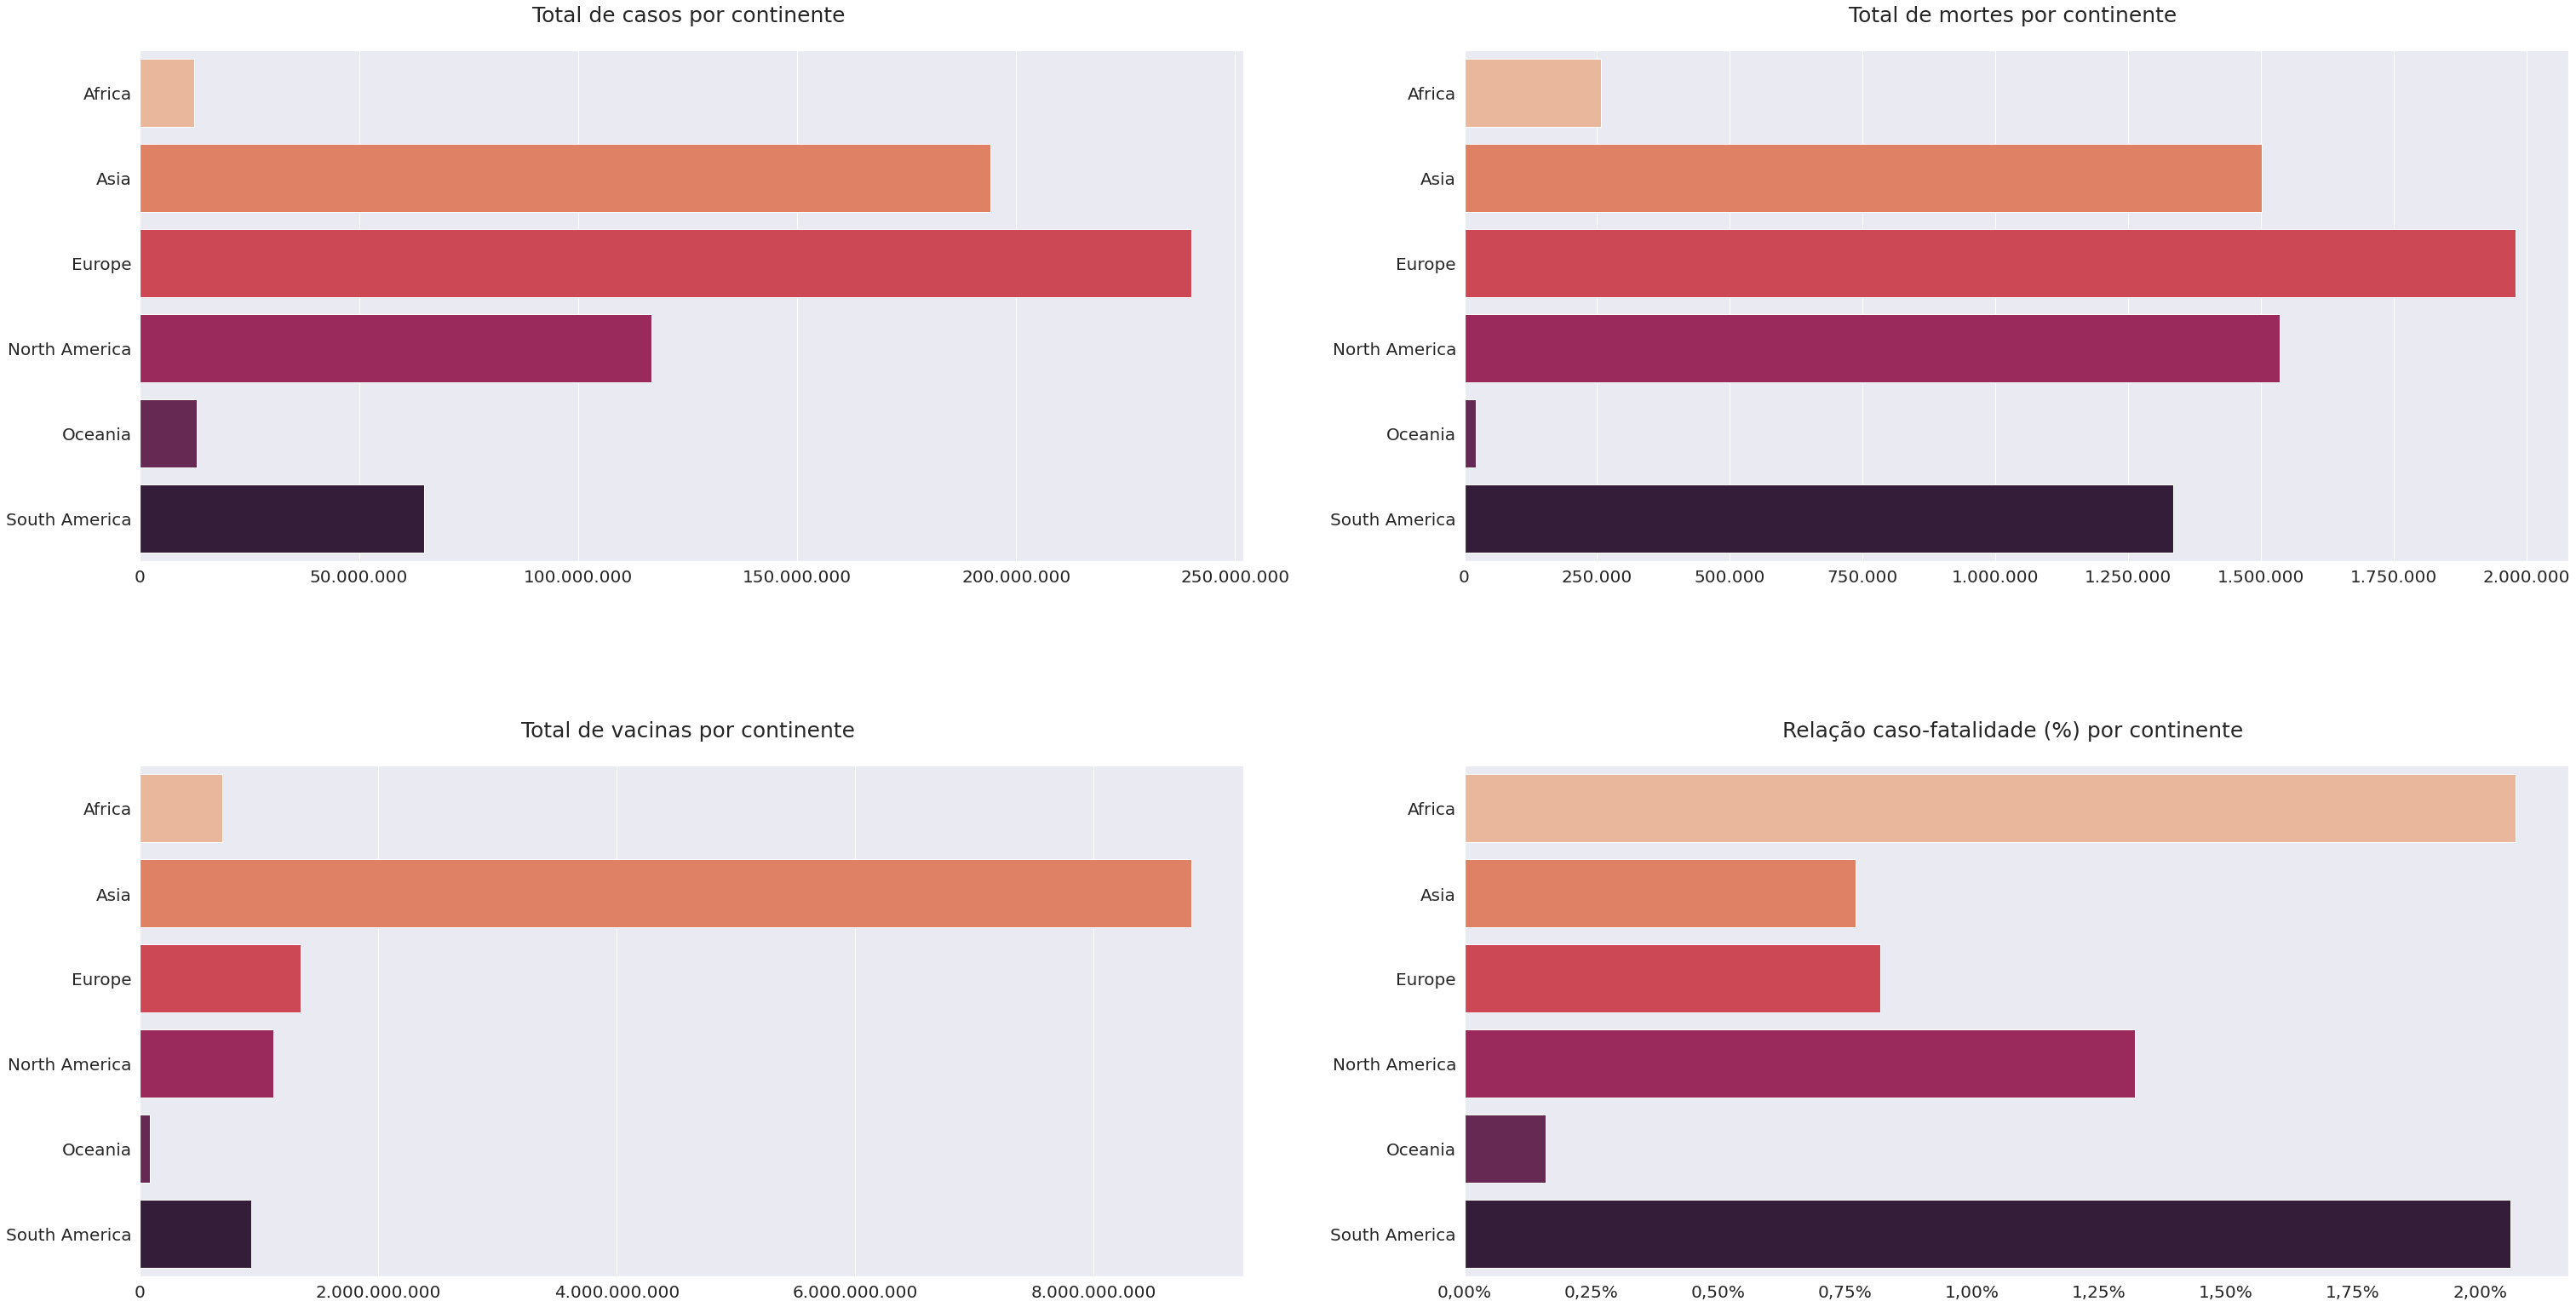

In [21]:
#Gráficos
sns.set_theme(style = "dark")
fig, ax = plt.subplots(2, 2, figsize = (36,25))
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 1.2, top = 0.9, wspace = 0.2, hspace = 0.4)

ax[0, 0].ticklabel_format(style='plain') #remover notação científica
ax[0, 1].ticklabel_format(style='plain') #remover notação científica
ax[1, 0].ticklabel_format(style='plain') #remover notação científica

ax[0, 0].set_title('Total de casos por continente \n', fontsize = 25)
ax[0, 0] = sns.barplot(data = df_continents, x = df_continents['total_cases'], y = df_continents['continent'], palette = "rocket_r", ci = None, 
                       order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ax = ax[0, 0])
ax[0, 0].set_xlabel(None)
ax[0, 0].set_ylabel(None)
ax[0, 0].tick_params(axis ='x', labelsize= 20)
ax[0, 0].tick_params(axis ='y', labelsize= 20)
ax[0, 0].xaxis.grid()
ax[0, 0].get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))

ax[0, 1].set_title('Total de mortes por continente \n', fontsize = 25)
ax[0, 1] = sns.barplot(data = df_continents, x = df_continents['total_deaths'], y = df_continents['continent'], palette = "rocket_r", ci = None, 
                       order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ax = ax[0, 1])
ax[0, 1].set_xlabel(None)
ax[0, 1].set_ylabel(None)
ax[0, 1].tick_params(axis ='x', labelsize= 20)
ax[0, 1].tick_params(axis ='y', labelsize= 20)
ax[0, 1].xaxis.grid()
ax[0, 1].get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))

ax[1, 0].set_title('Total de vacinas por continente \n', fontsize = 25)
ax[1, 0] = sns.barplot(data = df_continents, x = df_continents['total_vaccinations'], y = df_continents['continent'], palette = "rocket_r", ci = None, 
                       order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ax = ax[1, 0])
ax[1, 0].set_xlabel(None)
ax[1, 0].set_ylabel(None)
ax[1, 0].tick_params(axis ='x', labelsize= 20)
ax[1, 0].tick_params(axis ='y', labelsize= 20)
ax[1, 0].xaxis.grid()
ax[1, 0].get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))

ax[1, 1].set_title('Relação caso-fatalidade (%) por continente \n', fontsize = 25)
ax[1, 1] = sns.barplot(data = df_continents, x = df_continents['case_fatality_ratio'], y = df_continents['continent'], palette = "rocket_r", ci = None, 
                    order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ax = ax[1, 1])
ax[1, 1].set_xlabel(None)
ax[1, 1].set_ylabel(None)
ax[1, 1].tick_params(axis ='x', labelsize= 20)
ax[1, 1].tick_params(axis ='y', labelsize= 20)
ax[1, 1].get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(float(x)/100, ',.2%').replace('.', ',')))

plt.show()

# **Ranking com os 10 países que apresentaram mais mortes por covid-19, em termos absolutos e relativos**

<h3>Encontrar o número de mortes por país, em termos absolutos</h3>

In [22]:
df.groupby('location')['total_deaths'].max().sort_values(ascending = False).head(10)

location
World                  6629611
High income            2738006
Upper middle income    2502435
Europe                 1979302
North America          1536014
Asia                   1501054
Lower middle income    1341365
South America          1334824
European Union         1174075
United States          1079196
Name: total_deaths, dtype: int64

<h3>É necessário remover valores que não pertencem a um único país</h3>

In [23]:
#Remover valores que não pertencem a um único país e visualizar o ranking
df_ranking = df.loc[df.location.isin(['High income', 'Asia', 'Upper middle income', 'Europe', 'Africa', 'North America', 'Lower middle income', 'South America', 'European Union','Oceania', 'Low income', 'International', 'Micronesia (country)']) == False] 
vAbsolute_deaths = df_ranking.loc[df_ranking.location != 'World'].groupby('location')['total_deaths'].max().sort_values(ascending = False).map('{:0,.0f}'.format).head(10)
vAbsolute_deaths = pd.DataFrame(vAbsolute_deaths)
#vAbsolute_deaths

<h3>Encontrar os 10 países que tiveram os maiores percentuais de mortes por covid-19 no mundo</h3>


In [24]:
#Selecionar valores para realizar o cálculo do valor percentual do total de mortes
world = df_ranking[['location', 'total_deaths']].loc[df_ranking.location == 'World'].max()

countries = df_ranking[['location', 'total_deaths']].loc[df_ranking.location != 'World'].groupby('location').max()

In [25]:
#Visualizar o ranking
percent_deaths = (countries.total_deaths/world.total_deaths).sort_values(ascending = False).head(10)
percent_deaths = pd.DataFrame(percent_deaths).rename(columns = {'total_deaths': '%total_deaths'})
percent_deaths["rank_total_deaths"] = percent_deaths['%total_deaths'].rank(ascending = False).map('{:0,.0f}'.format)
percent_deaths["%total_deaths"] = percent_deaths['%total_deaths'].map('{:0,.2%}'.format)
#percent_deaths

<h3>Ranquear os países mais populosos do mundo</h3>


In [26]:
rank_population = df_ranking.loc[df_ranking.location != 'World'].groupby('location')['population'].max().sort_values(ascending = False)
rank_population = pd.DataFrame(rank_population)
rank_population["population_rank"] = rank_population['population'].rank(ascending = False).map('{:0,.0f}'.format)
rank_population['population'] = rank_population['population'].map('{:0,.0f}'.format)
#rank_population.head(10)

<h2>Tabela final</h2>

In [27]:
tb_final = vAbsolute_deaths.merge(percent_deaths, on = 'location').merge(rank_population['population_rank'], on = 'location')
tb_final

,total_deaths,%total_deaths,rank_total_deaths,population_rank
location,,,,
United States,"1,079,196",16.28%,1,3
Brazil,"689,442",10.40%,2,7
India,"530,608",8.00%,3,2
Russia,"383,841",5.79%,4,9
Mexico,"330,495",4.99%,5,10
Peru,"217,314",3.28%,6,44
United Kingdom,"211,845",3.20%,7,22
Italy,"181,098",2.73%,8,25
Indonesia,"159,600",2.41%,9,4


In [36]:
#Necessário executar o código abaixo para imprimir o gráfico a seguir no Colab e no Github
'''
!pip install -U kaleido
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
'''

'\n!pip install -U kaleido\n!pip install plotly>=4.7.1\n!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca\n!chmod +x /usr/local/bin/orca\n!apt-get install xvfb libgtk2.0-0 libgconf-2-4\n'

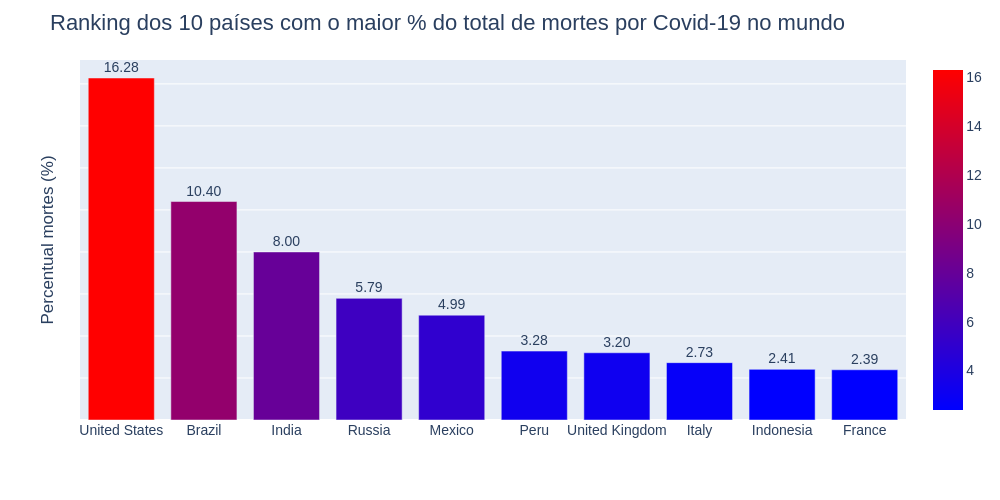

In [29]:
#Selecionar os dados do percentual do total de mortes
dados_barplot = ((countries.total_deaths/world.total_deaths)* 100).sort_values(ascending = False).round(2).head(10)
dados_barplot = pd.DataFrame(dados_barplot).rename(columns = {'total_deaths': '%total_deaths'})

#Gráfico
fig = px.bar(x = dados_barplot.index, y = dados_barplot['%total_deaths'], color = dados_barplot['%total_deaths'], 
             color_continuous_scale = 'Bluered', text_auto = '.2f', width = 1000, height = 500)

fig.update_coloraxes(colorbar_title_text = "")
fig.update_traces(textfont_size = 14, textangle = 0, textposition = "outside")
fig.update_yaxes(visible = True, showticklabels = False)


fig.update_layout(
    title = "Ranking dos 10 países com o maior % do total de mortes por Covid-19 no mundo \n",
    xaxis_title = None,
    yaxis_title = "Percentual mortes (%)",
    font = dict(size=14)
        )
fig.update_layout(title_font_size = 22)

fig.show('png') #'png' para visualizar no Github

## Ranking com os 10 países que apresentaram mais mortes por covid-19 a cada  milhão de habitantes

Obs: sistema de separação de milhar em inglês

In [30]:
deaths_per_million = df_ranking.groupby('location')['total_deaths_per_million'].max().sort_values(ascending = False).head(10).map('{:0,.0f}'.format)
deaths_per_million = pd.DataFrame(deaths_per_million)
deaths_per_million

,total_deaths_per_million
location,
Peru,"6,382"
Bulgaria,"5,607"
Bosnia and Herzegovina,"5,010"
Hungary,"4,840"
North Macedonia,"4,570"
Georgia,"4,517"
Montenegro,"4,448"
Croatia,"4,289"
Czechia,"3,982"


# **Ranking com os 10 países que apresentaram maior relação caso-fatalidade**

In [31]:
#Selecionar o último valor informado por cada país
case_fatality_ratio = df_ranking.groupby('location')[['total_cases', 'total_deaths']].max()
case_fatality_ratio = case_fatality_ratio.loc[(case_fatality_ratio['total_cases'] != 0) & (case_fatality_ratio['total_deaths'] != 0)] #Mantém apenas os países que possuem registos para número de casos ou de mortes

In [32]:
case_fatality_ratio = df_ranking.groupby('location')[['total_cases', 'total_deaths']].max()
case_fatality_ratio['case_fatality_ratio'] = round((case_fatality_ratio['total_deaths']/case_fatality_ratio['total_cases']) * 100, 2)
case_fatality_ratio['case_fatality_ratio'].sort_values(ascending = False).head(10)

location
Yemen                     18.07
Sudan                      7.84
Syria                      5.51
Peru                       5.16
Somalia                    4.99
Egypt                      4.81
Mexico                     4.64
Bosnia and Herzegovina     4.05
Afghanistan                3.81
Liberia                    3.67
Name: case_fatality_ratio, dtype: float64

## **Números da vacinação**

<h3>Números da vacinação por continente</h3>

In [33]:
data_vaccination = df[['location','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                       'people_fully_vaccinated_per_hundred']].loc[df.location.isin(['Asia', 'Europe', 'Africa', 'North America', 'South America','Oceania'])]

df_vaccination = data_vaccination.groupby('location')[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 
                                                       'people_fully_vaccinated_per_hundred']].max().sort_values(by = 'location').applymap(lambda x: "{:,}".format(x))
df_vaccination.replace(',', '.', inplace = True, regex = True) #replace does full replacement searches, unless you turn on the regex switch. Use regex=True, and it should perform partial replacements as well.
df_vaccination

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
location,,,,,,
Africa,690.508.109,452.316.180,363.366.606,48.4,31.7,25.47
Asia,8.815.784.398,3.629.811.906,3.401.882.409,186.72,76.88,72.05
Europe,1.350.957.645,520.773.813,497.603.416,181.38,69.92,66.81
North America,1.117.183.561,454.673.576,391.212.026,186.1,75.74,65.17
Oceania,81.180.028,28.903.751,27.858.682,180.24,64.18,61.85
South America,931.102.252,372.554.543,335.046.410,213.16,85.29,76.7


<h3>Ranking com os 10 países que tiveram o maior número de pessoas totalmente vacinadas a cada 100 habitantes</h3>

In [34]:
df_ranking.groupby('location')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = False).head(10)

location
Gibraltar               126.76
Qatar                   105.71
United Arab Emirates    103.72
Brunei                   99.28
Singapore                91.02
Chile                    90.25
Hong Kong                90.21
Macao                    90.12
China                    89.22
Cuba                     89.19
Name: people_fully_vaccinated_per_hundred, dtype: float64

<h3>Ranking com os 10 países que tiveram o menor número de pessoas totalmente vacinadas a cada 100 habitantes</h3>

In [35]:
df_ranking.groupby('location')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = True).head(10)

location
Burundi                         0.20
Yemen                           2.01
Haiti                           2.04
Papua New Guinea                2.98
Democratic Republic of Congo    3.76
Cameroon                        4.65
Madagascar                      6.11
Senegal                         7.75
Syria                           9.51
Mali                            9.97
Name: people_fully_vaccinated_per_hundred, dtype: float64